<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [4]:
pip install pybea

  Using cached https://files.pythonhosted.org/packages/89/74/f4639713b2ec002435847498bc21bf011e99c75f499157369cc310252790/pybea-0.7.0a0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pybea

In [2]:
pybea.get_data_set_list?

In [3]:
# replace this with your BEA data API key!
USER_ID = '8D6E4F9E-A6D9-4B12-B240-6704A2A4B454'

In [4]:
# access the BEA data API...
available_datasets = pybea.get_data_set_list(USER_ID)
available_datasets

,DatasetName,DatasetDescription
0,NIPA,Standard NIPA tables
1,NIUnderlyingDetail,Standard NI underlying detail tables
2,MNE,Multinational Enterprises
3,FixedAssets,Standard Fixed Assets tables
4,ITA,International Transactions Accounts
5,IIP,International Investment Position
6,GDPbyIndustry,GDP by Industry
7,InputOutput,Input-Output Data
8,UnderlyingGDPbyIndustry,Underlying GDP by Industry
9,IntlServTrade,International Services Trade


In [5]:
request = pybea.api.DataSetListRequest(USER_ID,
                                       ResultFormat="JSON")
request.data_set_list

,DatasetName,DatasetDescription
0,NIPA,Standard NIPA tables
1,NIUnderlyingDetail,Standard NI underlying detail tables
2,MNE,Multinational Enterprises
3,FixedAssets,Standard Fixed Assets tables
4,ITA,International Transactions Accounts
5,IIP,International Investment Position
6,GDPbyIndustry,GDP by Industry
7,InputOutput,Input-Output Data
8,UnderlyingGDPbyIndustry,Underlying GDP by Industry
9,IntlServTrade,International Services Trade


In [9]:
NIPA_params = pybea.get_parameter_list(USER_ID, DataSetName='NIPA', ResultFormat='XML')
NIPA_params

,MultipleAcceptedFlag,ParameterDataType,ParameterDefaultValue,ParameterDescription,ParameterIsRequiredFlag,ParameterName
0,1,string,,"A - Annual, Q-Quarterly, M-Monthly",1,Frequency
1,0,string,N,A flag indicating that million-dollar data sho...,0,ShowMillions
2,0,integer,None,The standard NIPA table identifier,0,TableID
3,0,string,None,The new NIPA table identifier,0,TableName
4,1,integer,,List of year(s) of data to retrieve (X for All),1,Year


In [10]:
request = pybea.api.ParameterListRequest(USER_ID,
                                         DataSetName='NIPA',
                                         ResultFormat='JSON')
request.parameter_list

,ParameterName,ParameterDataType,ParameterDescription,ParameterIsRequiredFlag,ParameterDefaultValue,MultipleAcceptedFlag,AllValue
0,Frequency,string,"A - Annual, Q-Quarterly, M-Monthly",1,,1,
1,ShowMillions,string,A flag indicating that million-dollar data sho...,0,N,0,
2,TableID,integer,The standard NIPA table identifier,0,NaN,0,
3,TableName,string,The new NIPA table identifier,0,NaN,0,
4,Year,integer,List of year(s) of data to retrieve (X for All),1,,1,X


In [14]:
data = pybea.get_data(USER_ID,
                      DataSetName='NIPA',
                      TableName='T10101',
                      Frequency=['A', 'Q'],
                      Year='ALL',
                      ResultFormat="XML"
                      )

In [15]:
data

,TableName,SeriesCode,LineNumber,LineDescription,TimePeriod,CL_UNIT,UNIT_MULT,METRIC_NAME,DataValue
0,T10101,A191RL,1,Gross domestic product,1947Q2,"Percent change, annual rate",0,Fisher Quantity Index,-1.0
1,T10101,A191RL,1,Gross domestic product,1947Q3,"Percent change, annual rate",0,Fisher Quantity Index,-0.8
2,T10101,A191RL,1,Gross domestic product,1947Q4,"Percent change, annual rate",0,Fisher Quantity Index,6.4
3,T10101,A191RL,1,Gross domestic product,1948Q1,"Percent change, annual rate",0,Fisher Quantity Index,6.2
4,T10101,A191RL,1,Gross domestic product,1948Q2,"Percent change, annual rate",0,Fisher Quantity Index,6.8
...,...,...,...,...,...,...,...,...,...
7295,T10101,A191RP,27,"Gross domestic product, current dollars",2019Q1,"Percent change, annual rate",0,Current Dollars,3.9
7296,T10101,A191RP,27,"Gross domestic product, current dollars",2019Q2,"Percent change, annual rate",0,Current Dollars,4.7
7297,T10101,A191RP,27,"Gross domestic product, current dollars",2019Q3,"Percent change, annual rate",0,Current Dollars,3.8
7298,T10101,A191RP,27,"Gross domestic product, current dollars",2019Q4,"Percent change, annual rate",0,Current Dollars,3.5


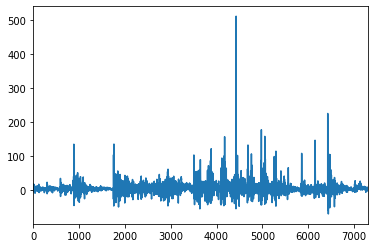

In [20]:
data['DataValue'].plot()

In [26]:
data.groupby('METRIC_NAME')